In [2]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
os.chdir('E:/Practical Time Series')

In [4]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.index = ibm_df['Date']

In [5]:
print('Shape of the DataFrame:', ibm_df.shape)

Shape of the DataFrame: (1010, 2)


In [6]:
ibm_df.head(10)

,Date,IBM common stock closing prices
Date,,
1/2/1962,1/2/1962,572.00
1/3/1962,1/3/1962,577.00
1/4/1962,1/4/1962,571.25
1/5/1962,1/5/1962,560.00
1/8/1962,1/8/1962,549.50
1/9/1962,1/9/1962,556.00
1/10/1962,1/10/1962,557.00
1/11/1962,1/11/1962,563.00
1/12/1962,1/12/1962,564.00


In [7]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)

In [8]:
ibm_df.head()

,Date,Close_Price
Date,,
1/2/1962,1/2/1962,572.00
1/3/1962,1/3/1962,577.00
1/4/1962,1/4/1962,571.25
1/5/1962,1/5/1962,560.00
1/8/1962,1/8/1962,549.50


In [9]:
missing = (pd.isnull(ibm_df['Date'])) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 1


In [10]:
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

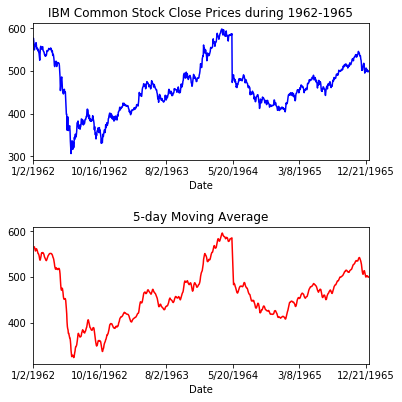

In [11]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('plots/Section 2/_02_13.png', format='png', dpi=300)

In [12]:
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

In [13]:
MA2 = MA2.loc[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2.loc[~pd.isnull(TwoXMA2)]

MA4 = MA4.loc[~pd.isnull(MA4)]
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

MA3 = MA3.loc[~pd.isnull(MA3)]
ThreeXMA3 = TwoXMA4.loc[~pd.isnull(ThreeXMA3)]

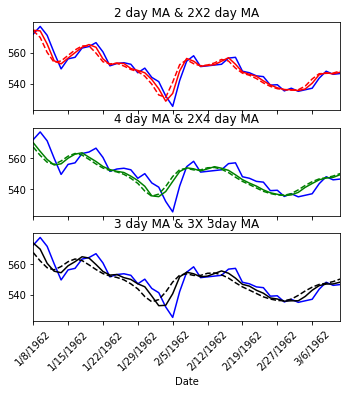

In [15]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
plt.xticks(rotation=45)
axarr[2].set_title('3 day MA & 3X 3day MA')
plt.savefig('plots/Section 2/_02_14.png', format='png', dpi=300)